## ExMAS
> Equilibrium matching - expieriments for the paper

---
# Toy network

* 10 requests
* 23 possible rides

#### Content:

* incidence matrix
* costs as a column sums
* costs for individuals
* solution: system optimal for users
* solution: system optimal for operator

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData

In [4]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/game/game_toy.json') # load the default 
params.t0 = pd.to_datetime(params.t0)
params.matching_obj = 'u_pax'
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph
inData.requests = ExMAS.utils.load_requests('ExMAS/spinoffs/game/toy.csv')

In [5]:
inData = ExMAS.main(inData, params, plot = False)
KPIs = inData.sblts.res.to_frame('u_pax')

### incidence matrix
rows are trips columns are rides,
1 if trip blongs to a ride, 0 otherwise

rides,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
trips,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


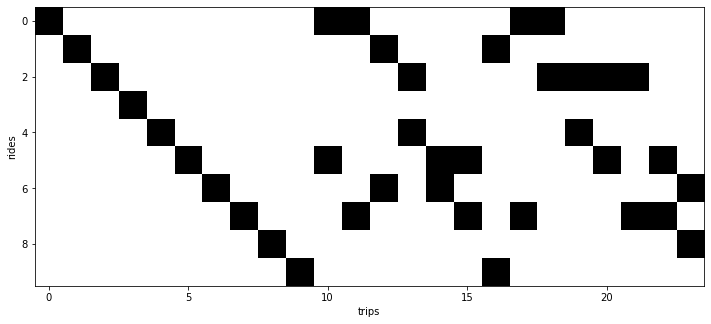

In [6]:
m = np.vstack(inData.sblts.rides['row'].values).T  # creates a numpy array for the constrains
m = pd.DataFrame(m).astype(int)
plt.rcParams['figure.figsize'] = [12, int(12*inData.sblts.rides.shape[0]/inData.requests.shape[0])]
fig, ax = plt.subplots()
ax.imshow(m, cmap='Greys', interpolation = 'Nearest')
ax.set_ylabel('rides')
_ = ax.set_xlabel('trips')
m.index.name = 'trips'
m.columns.name = 'rides'
m

costs
* passengers (total)
* vehicle

In [7]:
inData.sblts.rides[['u_pax','u_veh']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
u_pax,2.5495,3.1945,7.7655,2.196,3.661,2.4225,3.602,1.908,1.4895,4.03,4.35415,3.8281,6.4341,9.3031,5.33425,3.8961,7.00065,3.9009,9.7884,9.2121,9.6198,8.46585,3.8233,4.4955
u_veh,164,206,501,141,236,156,232,123,96,260,317,260,470,592,418,234,380,266,670,595,688,575,257,360


In [8]:
m_user_costs = m.copy()
for col in m.columns:
    new_col = [0]*params.nP
    indexes = inData.sblts.rides.loc[col]['indexes']
    u_paxes = inData.sblts.rides.loc[col].u_paxes
    for l,i in enumerate(indexes):
        new_col[i] = u_paxes[l]
    m_user_costs[col] = new_col
m_user_costs.round(1)

rides,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
trips,,,,,,,,,,,,,,,,,,,,,,,,
0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,2.1,0.0,0.0,0.0,0.0,0.0,2.4,2.5,0.0,0.0,0.0,0.0,0.0
1,0.0,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.3,0.0,0.0,0.0,0.0,7.3,6.4,7.3,6.6,0.0,0.0
3,0.0,0.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.4,0.0,0.0,0.0,0.0,2.2,0.0,0.0,0.0,2.2,2.1,0.0,0.0,0.0,0.0,2.4,0.0,2.3,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,3.4,0.0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,0.0,0.0,0.0,1.7,0.0,0.0,0.0,1.8,0.0,1.5,0.0,0.0,0.0,1.8,1.5,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2


### Solution: system optimal for user costs ('u_pax')

grey - feasible, black - selected


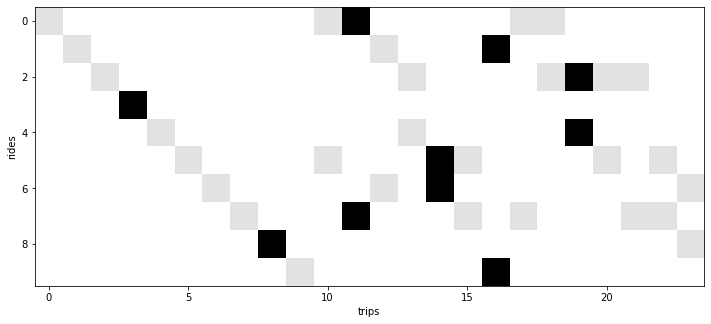

In [9]:
m_solution = m.copy()
fig, ax = plt.subplots()
for col in m.columns:
    if inData.sblts.rides.loc[col].selected==0:
        m_solution[col] = m[col]
    else:
        m_solution[col] = m[col]*5
ax.imshow(m_solution, cmap='Greys', interpolation = 'Nearest')
ax.set_ylabel('rides')
_ = ax.set_xlabel('trips')
print('grey - feasible, black - selected')

### Solution: system optimal for operator costs ('u_veh')

grey - feasible, black - selected


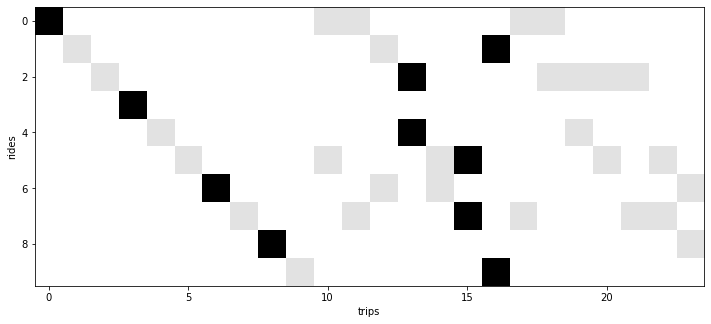

In [10]:
params.matching_obj = 'u_veh'
inData = ExMAS.main(inData, params, plot = False)
m_solution = m.copy()
fig, ax = plt.subplots()
for col in m.columns:
    if inData.sblts.rides.loc[col].selected==0:
        m_solution[col] = m[col]
    else:
        m_solution[col] = m[col]*5
ax.imshow(m_solution, cmap='Greys', interpolation = 'Nearest')
ax.set_ylabel('rides')
_ = ax.set_xlabel('trips')
print('grey - feasible, black - selected')

### KPIs for two solutions

In [11]:
KPIs['u_veh'] = inData.sblts.res
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs

,u_pax,u_veh,description
VehHourTrav,1830,1794,total travel time of vehicles (with travellers...
VehHourTrav_ns,2115,2115,as above yet in non-shared scenarion
PassHourTrav,2297,2245,total travel time of passengers
PassHourTrav_ns,2115,2115,as above yet in non-shared scenarion
PassUtility,29.0606,30.0369,total (dis)utility of passengers
PassUtility_ns,32.8185,32.8185,as above yet in non-shared scenarion
mean_lambda,0.119808,0.186235,mean vehicle cost reduction (lambda) over shar...
revenue_s,1903.5,1903.5,total fares paid by travellers sharing
revenue_ns,3172.5,3172.5,as above yet in non-shared scenarion
Fare_Discount,-0.4,-0.4,relative revenue reduction


---
(c) Rafał Kucharski, Delft, 2020